### Module 1 : Data Cleaning and Data collection 

In [ ]:
# Importing necessary libraries 
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'GAIL.NS'

In [ ]:
#last 10 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='10y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Yahoo fiance dataset is used 

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-09,104.343803,104.343803,101.643799,102.135986,73.833321,2388773
2012-04-10,101.137550,101.250053,91.167236,100.012550,72.298309,19487983
2012-04-11,100.350052,101.615677,98.465675,99.632858,72.023849,6737152
2012-04-12,99.689110,101.250053,99.689110,100.982864,72.999756,1583366
2012-04-13,100.687553,102.979736,99.703171,100.195358,72.430458,2982106
...,...,...,...,...,...,...
2022-03-30,153.500000,154.300003,151.899994,153.449997,153.449997,9955451
2022-03-31,154.800003,157.250000,152.850006,155.649994,155.649994,29091799
2022-04-01,157.000000,162.399994,155.850006,162.050003,162.050003,17417060


#### The dataset consists of 7 columns 
##### 1. Date => Format of the data "yy-m-dd
##### 2. Open => Price of the stock at open market
##### 3. High => Highest price reached in the day
##### 4. Low => Lowest price reached in the day 
##### 5. Close =>  Price of the stock at the close market
##### 6. Adj Close => Ajusted stock price of the day 
##### 7. Volume => Number of shares traded

### Module 2 : Exponential Data Analysis 

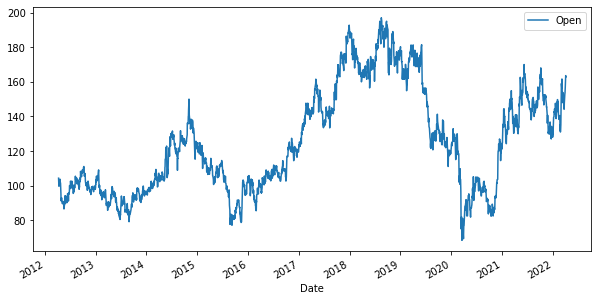

In [ ]:
# Price of the stock at open market corresponding to each year
# histogram  of the Open price
data['Open'].plot(legend=True, figsize = (10, 5))
plt.show()


Stock price at open market is really high in the years 2018 and  2019 and 
least in the year 2020



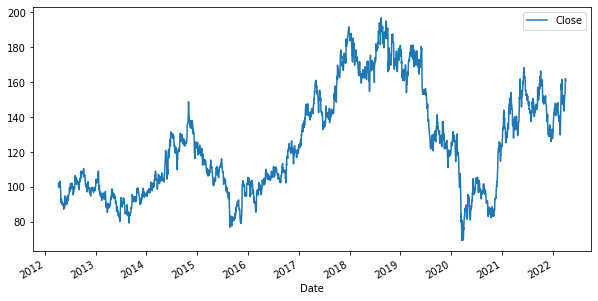

In [ ]:
# histogram  of the closing price
data['Close'].plot(legend=True, figsize = (10, 5))
plt.show()


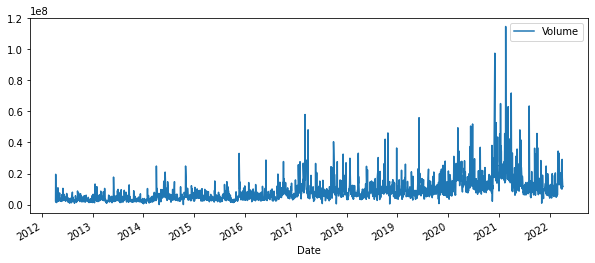

In [ ]:
# Total volume of stock being traded each day over the past 10 years
data['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [ ]:
len(ds_scaled), len(ds)

(1237, 1237)

In [ ]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [ ]:
train_size,test_size

(865, 372)

In [ ]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [ ]:
len(ds_train),len(ds_test)

(865, 372)

In [ ]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [ ]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [ ]:
X_train.shape,y_train.shape

((764, 100), (764,))

In [ ]:
X_test.shape, y_test.shape

((271, 100), (271,))

In [ ]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=64)

Epoch 1/25
12/12 [==============================] - 11s 330ms/step - loss: 0.1319 - val_loss: 0.0040
Epoch 2/25
12/12 [==============================] - 2s 196ms/step - loss: 0.0197 - val_loss: 0.0136
Epoch 3/25
12/12 [==============================] - 2s 193ms/step - loss: 0.0108 - val_loss: 0.0044
Epoch 4/25
12/12 [==============================] - 2s 197ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 5/25
12/12 [==============================] - 2s 191ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/25
12/12 [==============================] - 2s 192ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 7/25
12/12 [==============================] - 2s 195ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 8/25
12/12 [==============================] - 2s 194ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 9/25
12/12 [==============================] - 3s 251ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 10/25
12/12 [==============================] - 2s 197ms/step - loss: 0.0036 - val_loss: 0.003

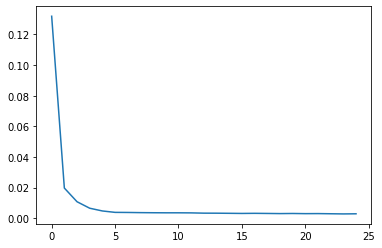

In [ ]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [ ]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

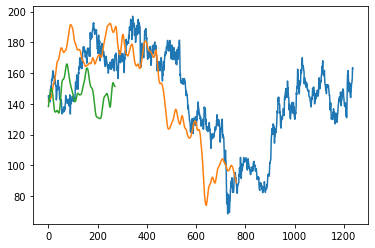

In [ ]:

#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [ ]:
type(train_predict)

numpy.ndarray

In [ ]:
test = np.vstack((train_predict,test_predict))

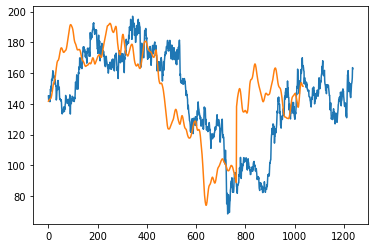

In [ ]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [ ]:
len(ds_test)

372

In [ ]:
#Getting the last 100 days records
fut_inp = ds_test[270:]

In [ ]:
fut_inp = fut_inp.reshape(1,-1)

In [ ]:
tmp_inp = list(fut_inp)

In [ ]:
fut_inp.shape

(1, 102)

In [ ]:

#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

In [ ]:
ds_new = ds_scaled.tolist()

In [ ]:
len(ds_new)

1237

In [ ]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

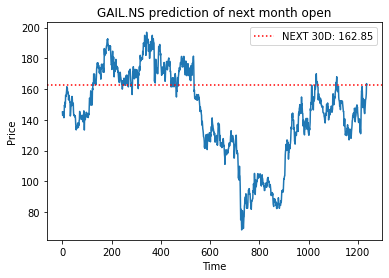

In [ ]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

